# TTT4185 Machine learning for Speech technology

## Voluntary computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful commands include `matplotlib.pyplot.plot`.

### Problem 1

In this problem we will look at a speech signal and do simple spectral analysis on the signal.

(a) Download the speech file `stry.wav` from Blackboard and load the file using `scipy.io.wavefile.read`. The speech represents the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.
- Plot the signal.
- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?
- Take a 40 millisecond subset of the vowel /iy/ and plot it.
- Find the fundamental frequency $F_0$ of the vowel.

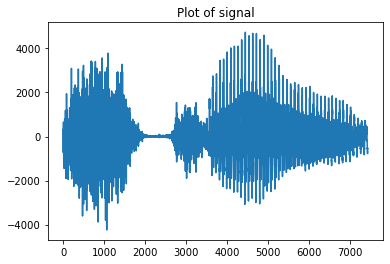

The characteristics of /s/, /t/, /r/ and /iy/: 

iy is a wovel, while s,t,r are constants. Wovels can be charactherized by the frequency of the first and second formants, therefore we can caractherise the iy wovel by identifying the first two formants in the frequency spectrum.
Constanants like s,t,r are instead characterised by the constriction or obstruction in the oral cavities. 

FS: 16000 FS is samples taken per second 

To get a 40 millisecond subset we must have Fs*40*10^-3 Sec = 640.0 number of samples 



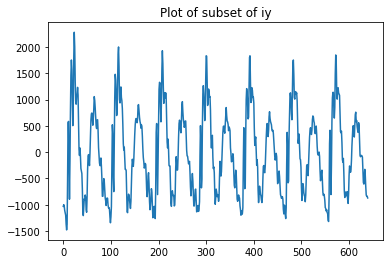

From the plot of the iy vowel we can se that the signal repeats itself after approximatly 95 samples. This gives us that the signal reapets itself after time T=95/F_S= 0.0059375 Sec 
  This lets us calculate the fundemental frequency as F_0=1/T= 168.42105263157896 Hz 



In [233]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft


Fs, data = scipy.io.wavfile.read('stry.wav')




plt.title("Plot of signal")
plt.plot(data)
plt.show()
print("The characteristics of /s/, /t/, /r/ and /iy/:","\n")

print("iy is a wovel, while s,t,r are constants. Wovels can be charactherized by the frequency of the first and second formants, therefore we can caractherise the iy wovel by identifying the first two formants in the frequency spectrum.")
print("Constanants like s,t,r are instead characterised by the constriction or obstruction in the oral cavities.","\n")


print("FS:", Fs, "FS is samples taken per second","\n")
Num_samples=Fs*40*1e-3
print("To get a 40 millisecond subset we must have Fs*40*10^-3 Sec =", Num_samples, "number of samples","\n")




plt.title("Plot of subset of iy")
iy = data[6000:6640]
plt.plot(iy)
plt.show()



T=95/Fs
F0=1/T
print("From the plot of the iy vowel we can se that the signal repeats itself after approximatly 95 samples. This gives us that the signal reapets itself after time T=95/F_S=",T,"Sec","\n"," This lets us calculate the fundemental frequency as F_0=1/T=",F0,"Hz","\n")










(b) Spectral analysis
- Estimate the spectrum of the vowel using an FFT of length 1024. Plot the log-spectrum as a function of frequency
- Multiply the signal by a Hamming window and repeat the last operation.
- Explain the difference between the two spectra.
- Estimate the fundamental frequency $F_0$ using the spectrum, and compare the result to what you got in 1a)
- Roughly estimate the two first formant frequencies.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`, `scipy.signal.hamming`.

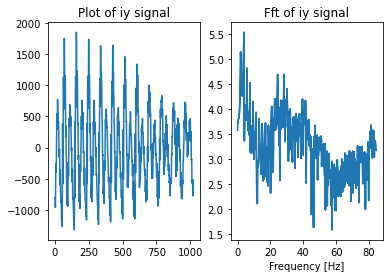

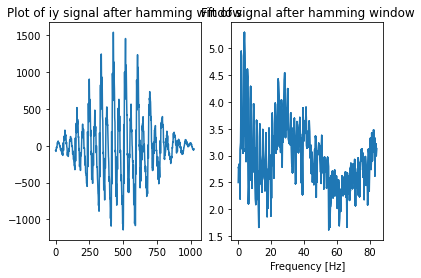

A hamming window is used for smoothing the values. It also smooths the begining and end of the sgnal. We can see this in the two plots of the signals. From the two spectras we can se that the fft of the signal after it has gone trough the hamming window is a lot smoother than the direct fft of the original signal. 

1012
F_0:  1.973684210526316 Hz
We can see that the fundemental frequency found using the fft is a bit higher than the one found via estimation, but they are fairly close 

The difference between the estimated fundemental frequency and the actual fundemental frequency is -166.02631578947367 Hz 

Peaks:  (array([  12,  148,  252,  426,  529,  629,  772,  876, 1012]), {})
Formant 1:  24.342105263157897 Hz
Formant 2:  41.44736842105264 Hz


/Users/torabjerkmo/opt/miniconda3/envs/ttt4185/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [262]:
from scipy import signal




samples_iy=data[-1024:] #splitting the data into last 1024 samples

N = int(len(samples_iy))
freq = np.linspace(0,(Fs/2),N)

#Without hamming window

plt.subplot(1,2,1)
plt.title("Plot of iy signal")
plt.plot(samples_iy) #Plotting the signal

plt.subplot(1,2,2)
plt.title("Fft of iy signal",)
plt.xlabel("Frequency [Hz]")
fft_iy=np.fft.fft(samples_iy,axis=0) #Taking the fft

freq=abs(np.fft.fftfreq(N,T)) #Generate frequency axis

plt.plot(freq,np.log10(np.abs(fft_iy))) #plotting the fft in log versus the frequency
plt.show()


#With hamming window

iy_hamming = samples_iy*signal.hamming(N) #Multiplying the original signal with the hamming window
plt.subplot(1,2,1)
plt.title("Plot of iy signal after hamming window")
plt.plot(iy_hamming) #plotting the signal


plt.subplot(1,2,2)
plt.title("Fft of signal after hamming window")
plt.xlabel("Frequency [Hz]")
fft_iy_hamming=np.fft.fft(iy_hamming,axis=0) #Taking the fft
plt.plot(freq, np.log10(np.abs(fft_iy_hamming))) #plotting the fft in log versus the frequency

plt.show()

print("A hamming window is used for smoothing the values. It also smooths the begining and end of the sgnal. We can see this in the two plots of the signals. From the two spectras we can se that the fft of the signal after it has gone trough the hamming window is a lot smoother than the direct fft of the original signal.","\n")

fft_max=np.argmax(fft_iy)
print(fft_max)
F0_fft = freq[fft_max] #Defining F_0 as the frequency of the maximum value of the fft
print("F_0: ",F0_fft, "Hz")
print("We can see that the fundemental frequency found using the fft is a bit higher than the one found via estimation, but they are fairly close","\n")
print("The difference between the estimated fundemental frequency and the actual fundemental frequency is",F0_fft-168,"Hz","\n")




peaks = signal.find_peaks(fft_iy, distance=100) #Finds the peaks of the fft where there must be 100 samples between each peak to fintd the different formants.
print("Peaks: ",peaks)

formant_1 = abs(freq[876]) #Finding the frequency of the first formant
print("Formant 1: ",formant_1, "Hz")


formant_2 = abs(freq[772]) #Finding the frequency of the second formant
print("Formant 2: ",formant_2,"Hz")





(c) AR modeling
- Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.
- Estimate the spectrum for each of the model orders. Plot the log-spectrum as a function of frequency.
- Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
- Why is it impossible to estimate the fundamental frequency based on the LP model?

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`.

In [234]:
import pysptk

# Computing AR coefficients and plotting the AR model on top of the original signal to see how good the fit is
for i in (4,8,16,50): # Doing this for order of 4,8,16,50
    ar_coefficients = pysptk.sptk.lpc(samples_iy,order = i)
    
    w,h= signal.freqz(b=ar_coefficients[0],a=(np.concatenate((np.array([1]), ar_coefficients[1:]))),fs=Fs)

    # Plotting the log spectrum
    title = "Order: " + str(k)
    plt.title(title)
    plt.plot(freq,np.log10(np.abs(fft_iy)),"b")
    plt.plot(w,np.log10(np.abs(h)), "r")
    plt.show()
    
    
print("The best specteral envelope is when the order is 8. When the order is 8 we get sharp first and second formants. The third and fourth formant is better shown when the order is 16, but then the two first formants are not as defined.")
print("If the order is too low it is not a good estimation of the given signsl, but if it is too high i.e. 50 we get the problem of overfitting.")


ModuleNotFoundError: No module named 'pysptk'

(d) Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjutinf the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

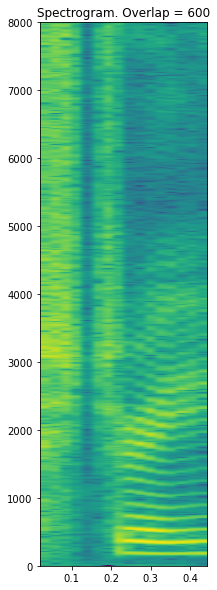

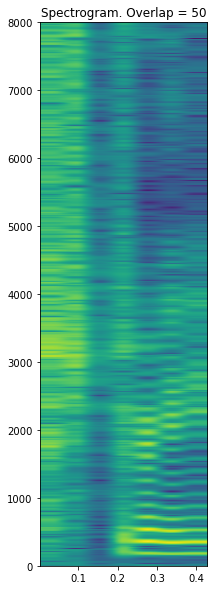

In [184]:
plt.figure(figsize=(3,10))

plt.title("Spectrogram. Overlap = 600",)
plt.specgram(data,NFFT=1024,Fs=Fs,noverlap=600,scale="dB") #Making a spectogram of the speech signal with 600 overlap
plt.show()

plt.figure(figsize=(3,10))
plt.title("Spectrogram. Overlap = 50",)
plt.specgram(data,NFFT=1024,Fs=Fs,noverlap=50,scale="dB") #Making a spectogram of the speech signal with 50 overlap
plt.show()






### Problem 2
In this problem we look at the cepstrum and deconvolution

(a) Compute and plot the real cepstrum of the vowel from problem 1a).

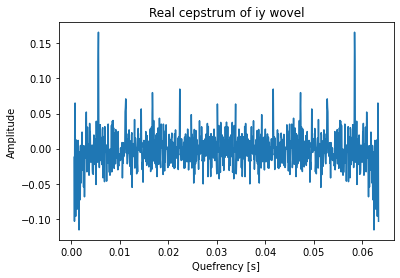

In [235]:
iy_cepstrum = np.fft.ifft(np.log(np.abs(fft_iy)))
iy_real_cepstrum = np.real(iy_cepstrum)
x_axis = np.linspace(0,len(iy_cepstrum)/Fs,len(iy_cepstrum)) 

plt.title("Real cepstrum of iy wovel")
plt.xlabel("Quefrency [s]")
plt.ylabel("Amplitude")

#plots the real cepstrum as a function of the quefrenzy
plt.plot(x_axis[10:len(x_axis)-10],(iy_real_cepstrum[10:len(iy_real_cepstrum)-10])) 








(b) Use the cepstrum to compute the fundamental frequency $F_0$. Compare your results with those obtained in problem 1).



In [241]:

cepmax = np.argmax(iy_real_cepstrum[10:len(iy_real_cepstrum)-10]) 


quefrenzy_0=x_axis[cepmax+10] # corresponds to approximatly 0.005 on the quefrency scale, which is where we can se the first peak.
F0_cepstrum=1/quefrenzy_0

print("F_0: ",F0_cepstrum)

print("We can see that this value for F_0 is a bit higher than that found in 1a), but not by a lot.")


F_0:  177.60416666666666
We can see that this value for F_0 is a bit higher than that found in 1a), but not by a lot.


(c) In this subproblem you will use the cepstrum to estimate the spectral envelope
- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from problem 1).

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal mus be symmetric as well.

Hint 2: The FFT of a real, symmtric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.

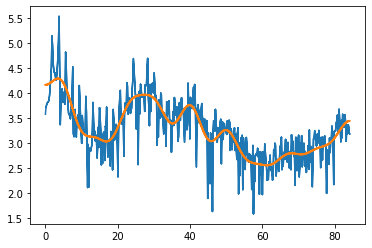

In [269]:
envelope = iy_real_cepstrum
envelope[20:len(envelope)-20] = 0

spectral_envelope = np.abs(np.exp(np.fft.fft(envelope, n=1024)))
plt.plot(freq,np.log10(np.abs(fft_iy))) #Plotting the fft from 1a)
plt.plot(freq,np.log10(spectral_envelope), linewidth=2) #plotting the spectral envelope on top of it

